<a href="https://colab.research.google.com/github/PoojaSreeOviya/CODSOFT/blob/main/CodSoft_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
taskTrain_df = pd.read_csv('/content/drive/MyDrive/fraudTrain.csv')
taskTest_df = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')

In [ ]:
total_df = pd.concat([taskTrain_df, taskTest_df])
len(total_df)

1852394

In [ ]:
total_df['is_fraud'] = total_df['is_fraud'].astype(bool)

In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               b

In [ ]:
total_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,False
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,False
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,False
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,False
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,False


In [ ]:
total_df.dropna(inplace=True)

In [ ]:
total_df = total_df[['cc_num','amt','lat','long','merch_lat','merch_long','is_fraud']]
X = total_df
y = total_df['is_fraud']

In [ ]:
X.drop('is_fraud',axis=1,inplace=True)

In [ ]:
X

,cc_num,amt,lat,long,merch_lat,merch_long
0,2703186189652095,4.97,36.0788,-81.1781,36.011293,-82.048315
1,630423337322,107.23,48.8878,-118.2105,49.159047,-118.186462
2,38859492057661,220.11,42.1808,-112.2620,43.150704,-112.154481
3,3534093764340240,45.00,46.2306,-112.1138,47.034331,-112.561071
4,375534208663984,41.96,38.4207,-79.4629,38.674999,-78.632459
...,...,...,...,...,...,...
555714,30560609640617,43.77,40.4931,-91.8912,39.946837,-91.333331
555715,3556613125071656,111.84,29.0393,-95.4401,29.661049,-96.186633
555716,6011724471098086,86.88,46.1966,-118.9017,46.658340,-119.715054
555717,4079773899158,7.99,44.6255,-116.4493,44.470525,-117.080888


In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   amt         float64
 2   lat         float64
 3   long        float64
 4   merch_lat   float64
 5   merch_long  float64
dtypes: float64(5), int64(1)
memory usage: 98.9 MB


In [ ]:
total_df.head(10)

,cc_num,amt,lat,long,merch_lat,merch_long
0,2703186189652095,4.97,36.0788,-81.1781,36.011293,-82.048315
1,630423337322,107.23,48.8878,-118.2105,49.159047,-118.186462
2,38859492057661,220.11,42.1808,-112.2620,43.150704,-112.154481
3,3534093764340240,45.00,46.2306,-112.1138,47.034331,-112.561071
4,375534208663984,41.96,38.4207,-79.4629,38.674999,-78.632459
5,4767265376804500,94.63,40.3750,-75.2045,40.653382,-76.152667
6,30074693890476,44.54,37.9931,-100.9893,37.162705,-100.153370
7,6011360759745864,71.65,38.8432,-78.6003,38.948089,-78.540296
8,4922710831011201,4.27,40.3359,-79.6607,40.351813,-79.958146
9,2720830304681674,198.39,36.5220,-87.3490,37.179198,-87.485381


In [ ]:
complete_df = total_df[total_df.cc_num==4767265376804500]

In [ ]:
complete_df

,cc_num,amt,lat,long,merch_lat,merch_long
5,4767265376804500,94.63,40.375,-75.2045,40.653382,-76.152667
3556,4767265376804500,1.37,40.375,-75.2045,40.009640,-75.902965
5836,4767265376804500,17.25,40.375,-75.2045,41.115743,-74.456432
8041,4767265376804500,1.39,40.375,-75.2045,39.666801,-75.766857
8302,4767265376804500,6.52,40.375,-75.2045,41.283461,-74.957376
...,...,...,...,...,...,...
538356,4767265376804500,122.54,40.375,-75.2045,40.043037,-75.893696
538435,4767265376804500,1.89,40.375,-75.2045,41.096250,-76.204222
549019,4767265376804500,176.19,40.375,-75.2045,40.351272,-76.101805
552722,4767265376804500,67.14,40.375,-75.2045,39.773205,-75.950262


<Axes: >

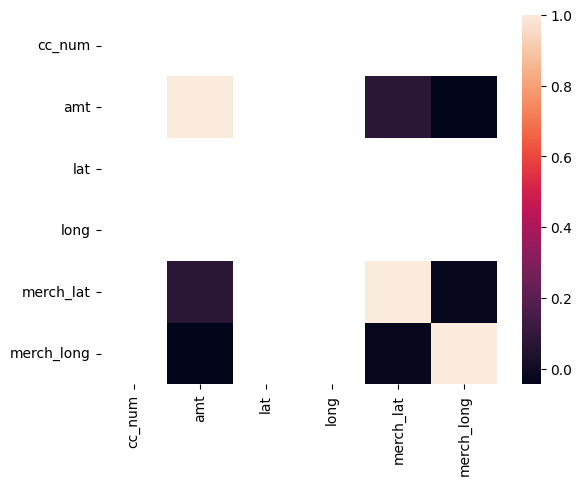

In [ ]:
sns.heatmap(complete_df[[i for i in complete_df.columns\
                         if complete_df[i].dtype == 'int64' \
                            or complete_df[i].dtype == 'float64']]\
                            .corr())

RANDOM FOREST ALGORITHM

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9953465648525287


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[368209    317]
 [  1407    546]]


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    368526
        True       0.63      0.28      0.39      1953

    accuracy                           1.00    370479
   macro avg       0.81      0.64      0.69    370479
weighted avg       0.99      1.00      0.99    370479



LOGISTIC REGRESSION ALGORITHM

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.9942884751902267


In [ ]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[368363    163]
 [  1953      0]]


In [ ]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00    368526
        True       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479



DECISION TREE ALGORITHM

In [ ]:
dt = DecisionTreeClassifier(criterion = "entropy")

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dtpred = dt.predict(X_test)

In [ ]:
accuracy=accuracy_score (dtpred,y_test)

In [ ]:
print("Accuracy:", accuracy_score(dtpred,y_test))

Accuracy: 0.9926473565303296


In [ ]:
dtcm=confusion_matrix(dtpred,y_test)

In [ ]:
dtcm

array([[367162,   1360],
       [  1364,    593]])

In [ ]:
from sklearn.tree import export_text
tree_rules=export_text(dt,feature_names=list(X.columns))
print(tree_rules)

|--- amt <= 1.18
|   |--- amt <= -0.29
|   |   |--- amt <= -0.40
|   |   |   |--- amt <= -0.40
|   |   |   |   |--- lat <= 0.13
|   |   |   |   |   |--- amt <= -0.40
|   |   |   |   |   |   |--- amt <= -0.43
|   |   |   |   |   |   |   |--- cc_num <= -0.32
|   |   |   |   |   |   |   |   |--- cc_num <= -0.32
|   |   |   |   |   |   |   |   |   |--- amt <= -0.43
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- amt >  -0.43
|   |   |   |   |   |   |   |   |   |   |--- merch_lat <= -1.27
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- merch_lat >  -1.27
|   |   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |--- cc_num >  -0.32
|   |   |   |   |   |   |   |   |   |--- merch_long <= 0.57
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- merch_long >  0.57
|   |   |   |   |   |   | 